In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option("display.max_columns", 500)

In [2]:
df = pd.read_parquet("/kaggle/input/flight-delays")

In [3]:
df.head()

,Month,DayOfWeek,DayofMonth,DOT_ID_Operating_Airline,Distance,DistanceGroup,DestAirportSeqID,CRSDepTime,IATA_Code_Operating_Airline,Airline,OriginAirportID,DestCityName,DestAirportID,Diverted,Cancelled,IATA_Code_Marketing_Airline,DepDelayMinutes,daytime,DelayGroup
0,4,1,4,20445,212.0,1,1129202,1133,C5,"Commutair Aka Champlain Enterprises, Inc.",11921,"Denver, CO",11292,False,False,UA,0.0,Morning,2
1,4,1,4,20445,295.0,2,1226603,732,C5,"Commutair Aka Champlain Enterprises, Inc.",12206,"Houston, TX",12266,False,False,UA,0.0,Morning,2
2,4,1,4,20445,251.0,2,1129202,1529,C5,"Commutair Aka Champlain Enterprises, Inc.",11413,"Denver, CO",11292,False,False,UA,0.0,Day,2
3,4,1,4,20445,376.0,2,1197302,1435,C5,"Commutair Aka Champlain Enterprises, Inc.",12266,"Gulfport/Biloxi, MS",11973,False,False,UA,0.0,Day,2
4,4,1,4,20445,251.0,2,1129202,1135,C5,"Commutair Aka Champlain Enterprises, Inc.",11413,"Denver, CO",11292,False,False,UA,0.0,Morning,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28430698 entries, 0 to 29193781
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Month                        int64  
 1   DayOfWeek                    int64  
 2   DayofMonth                   int64  
 3   DOT_ID_Operating_Airline     int64  
 4   Distance                     float64
 5   DistanceGroup                int64  
 6   DestAirportSeqID             int64  
 7   CRSDepTime                   int64  
 8   IATA_Code_Operating_Airline  object 
 9   Airline                      object 
 10  OriginAirportID              int64  
 11  DestCityName                 object 
 12  DestAirportID                int64  
 13  Diverted                     bool   
 14  Cancelled                    bool   
 15  IATA_Code_Marketing_Airline  object 
 16  DepDelayMinutes              float64
 17  daytime                      object 
 18  DelayGroup                   int64  
dtypes: 

In [5]:
label_encoder = LabelEncoder()

df[['Cancelled','Diverted']] = df[['Cancelled','Diverted']].astype(int)

for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = label_encoder.fit_transform(df[column])

In [6]:
X = df.drop('DelayGroup', axis=1)
y = df['DelayGroup']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [11]:
# Initialize the models
models = {
    'XGBoost': XGBClassifier(random_state=42)}

In [13]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    eval_set = [(X_train, y_train), (X_val, y_val)]
    
    # Train the model
    model.fit(X_train, y_train, eval_set=eval_set, verbose=True)
    
    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate the model on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} Validation Accuracy: {val_accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_test_pred))
    print("-" * 60)


Training XGBoost...
[0]	validation_0-mlogloss:0.85369	validation_1-mlogloss:0.85369
[1]	validation_0-mlogloss:0.58093	validation_1-mlogloss:0.58093
[2]	validation_0-mlogloss:0.40910	validation_1-mlogloss:0.40909
[3]	validation_0-mlogloss:0.29323	validation_1-mlogloss:0.29323
[4]	validation_0-mlogloss:0.21243	validation_1-mlogloss:0.21243
[5]	validation_0-mlogloss:0.15497	validation_1-mlogloss:0.15496
[6]	validation_0-mlogloss:0.11359	validation_1-mlogloss:0.11359
[7]	validation_0-mlogloss:0.08356	validation_1-mlogloss:0.08355
[8]	validation_0-mlogloss:0.06163	validation_1-mlogloss:0.06162
[9]	validation_0-mlogloss:0.04555	validation_1-mlogloss:0.04554
[10]	validation_0-mlogloss:0.03373	validation_1-mlogloss:0.03373
[11]	validation_0-mlogloss:0.02502	validation_1-mlogloss:0.02502
[12]	validation_0-mlogloss:0.01860	validation_1-mlogloss:0.01860
[13]	validation_0-mlogloss:0.01385	validation_1-mlogloss:0.01385
[14]	validation_0-mlogloss:0.01035	validation_1-mlogloss:0.01034
[15]	validation

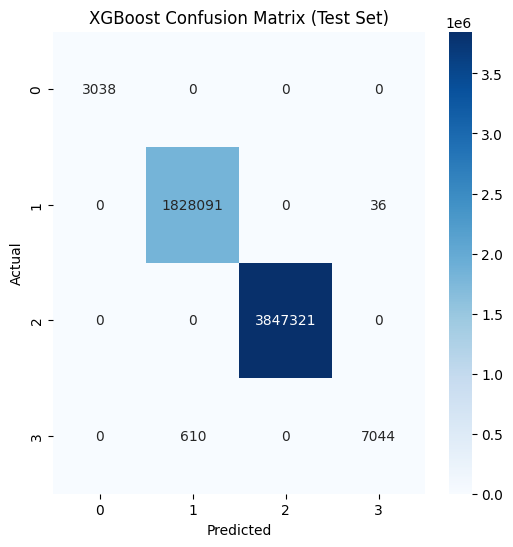

In [22]:
# Plot the confusion matrix for the test set
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_test_pred, title='XGBoost Confusion Matrix (Test Set)')

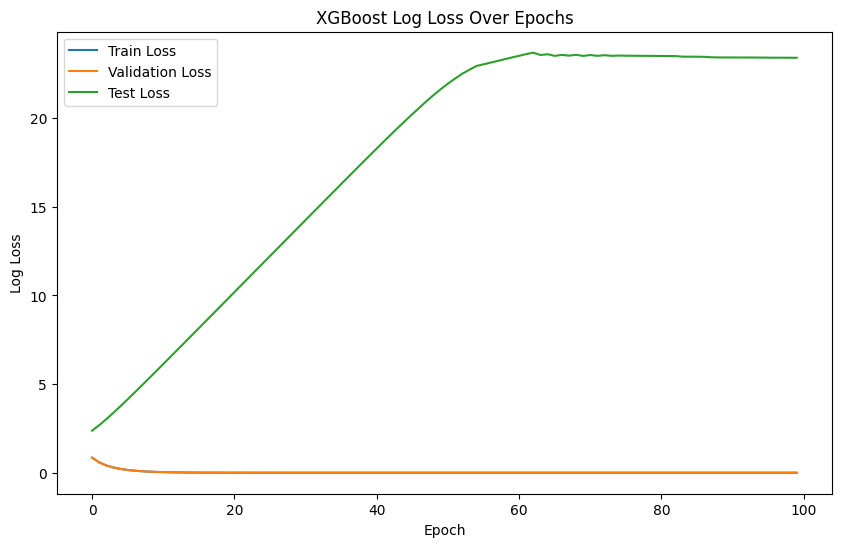

In [21]:
# Plot the losses for train, validation, and test sets
def plot_losses(model):
    results = model.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train Loss')
    plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation Loss')
    
    # Calculate test loss (log loss) for each epoch
    test_loss = []
    for epoch in range(epochs):
        y_test_prob = model.predict_proba(X_test, iteration_range=(0, epoch + 1))
        test_loss.append(-np.mean(y_test * np.log(y_test_prob[:, 1]) + (1 - y_test) * np.log(1 - y_test_prob[:, 0])))
    
    plt.plot(x_axis, test_loss, label='Test Loss')
    
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss Over Epochs')
    plt.show()

plot_losses(model)

In [26]:
with open('/kaggle/working/xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

